<a href="https://colab.research.google.com/github/TracyWang0110/Machine-learning-projects/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kmodes

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from kmodes.kmodes import KModes

from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
#load the csv file
df = pd.read_csv('heart_attack_data.csv')

In [ ]:
df.head()

,age,smoking,alcohol_use,physical_activity,diet,obesity,patient_id,gender,height
0,82,no,no,running,balanced,no,3,male,154
1,76,no,no,running,vegan,no,104,female,191
2,76,no,no,swimming,vegetarian,no,97,female,164
3,83,no,no,running,vegetarian,no,112,male,187
4,69,no,no,exercise,vegetarian,no,70,female,163


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                200 non-null    int64 
 1   smoking            200 non-null    object
 2   alcohol_use        200 non-null    object
 3   physical_activity  200 non-null    object
 4   diet               200 non-null    object
 5   obesity            200 non-null    object
 6   patient_id         200 non-null    int64 
 7   gender             200 non-null    object
 8   height             200 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 14.2+ KB


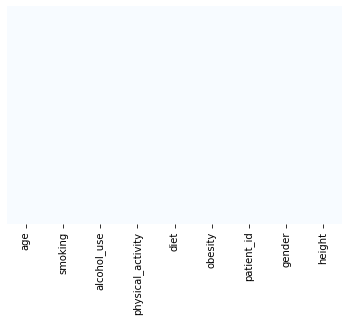

In [ ]:
#there is no missing value
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#check the duplication 
#there is no duplication in data 
df.duplicated().sum()

0

In [ ]:
df.describe(include='all')
# Mean age is 73 

,age,smoking,alcohol_use,physical_activity,diet,obesity,patient_id,gender,height
count,200.000000,200,200,200,200,200,200.000000,200,200.000000
unique,NaN,3,3,6,5,2,NaN,2,NaN
top,NaN,no,no,no,no,no,NaN,female,NaN
freq,NaN,140,140,60,60,188,NaN,101,NaN
mean,72.980000,NaN,NaN,NaN,NaN,NaN,154.710000,NaN,173.605000
std,11.275428,NaN,NaN,NaN,NaN,NaN,87.345245,NaN,14.288801
min,38.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,150.000000
25%,66.000000,NaN,NaN,NaN,NaN,NaN,78.750000,NaN,161.000000
50%,74.500000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN,172.500000
75%,82.000000,NaN,NaN,NaN,NaN,NaN,229.250000,NaN,185.000000


In [ ]:
# Drop patientID since it has no meaning here 
df.drop("patient_id", axis = 1, inplace= True)

In [ ]:
len(df) #n=200

200

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6d0a2490>,
      dtype=object)

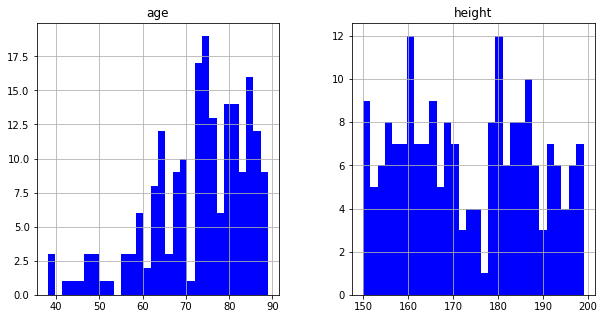

In [ ]:
#distribution 
df.hist(bins = 30, figsize = (10,5), color = 'b')

Text(0, 0.5, 'hight')

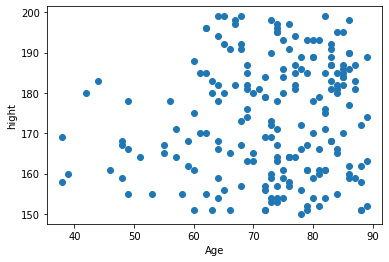

In [ ]:
plt.scatter(df['age'], df['height'])
plt.xlabel('Age')
plt.ylabel('hight')


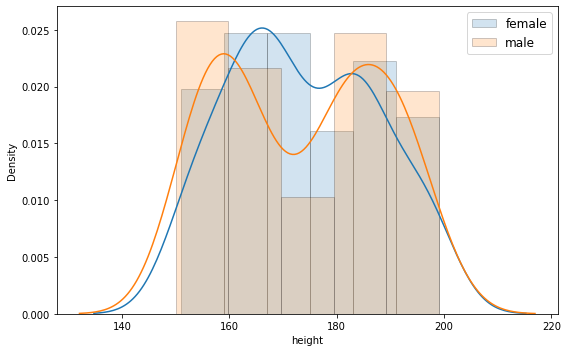

In [ ]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
# visualization of height and female
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df[df['gender']=='female']['height'], label='female', ax=ax, hist_kws=hist_kws)
sns.distplot(df[df['gender']=='male']['height'], label='male', ax=ax, hist_kws=hist_kws)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                200 non-null    int64 
 1   smoking            200 non-null    object
 2   alcohol_use        200 non-null    object
 3   physical_activity  200 non-null    object
 4   diet               200 non-null    object
 5   obesity            200 non-null    object
 6   gender             200 non-null    object
 7   height             200 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


Text(0.5, 1.0, 'Count Plot of alcohol use')

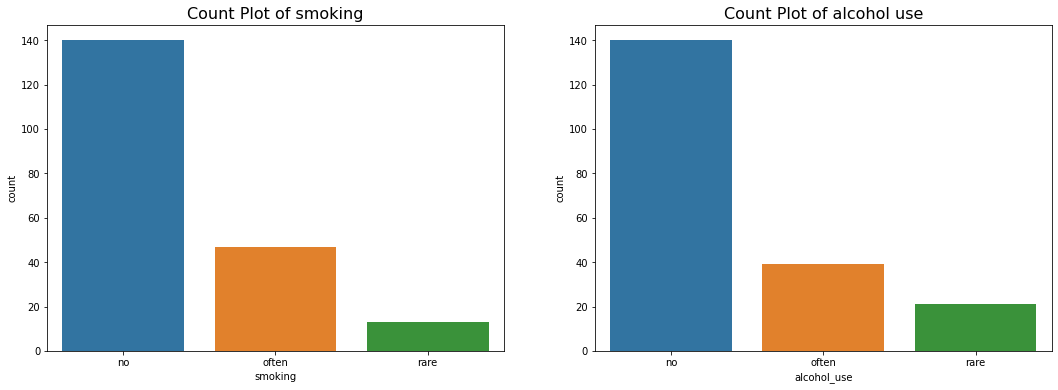

In [ ]:
# visualization of smoking, alcohol_use
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='smoking', data=df, ax=ax[0], order = df['smoking'].value_counts().index)
ax[0].set_title('Count Plot of smoking', fontsize=16)

sns.countplot(x='alcohol_use', data=df, ax=ax[1], order = df['alcohol_use'].value_counts().index)
ax[1].set_title('Count Plot of alcohol use', fontsize=16)


Text(0.5, 1.0, 'Count Plot of diet')

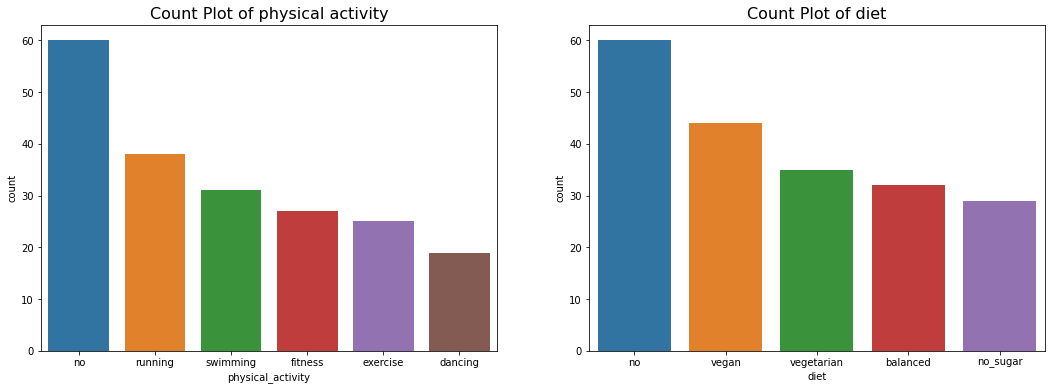

In [ ]:
# visualization of obesity , diet
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='physical_activity', data=df, ax=ax[0], order = df['physical_activity'].value_counts().index)
ax[0].set_title('Count Plot of physical activity', fontsize=16)

sns.countplot(x='diet', data=df, ax=ax[1], order = df['diet'].value_counts().index)
ax[1].set_title('Count Plot of diet', fontsize=16)


Text(0.5, 1.0, 'Count Plot of gender')

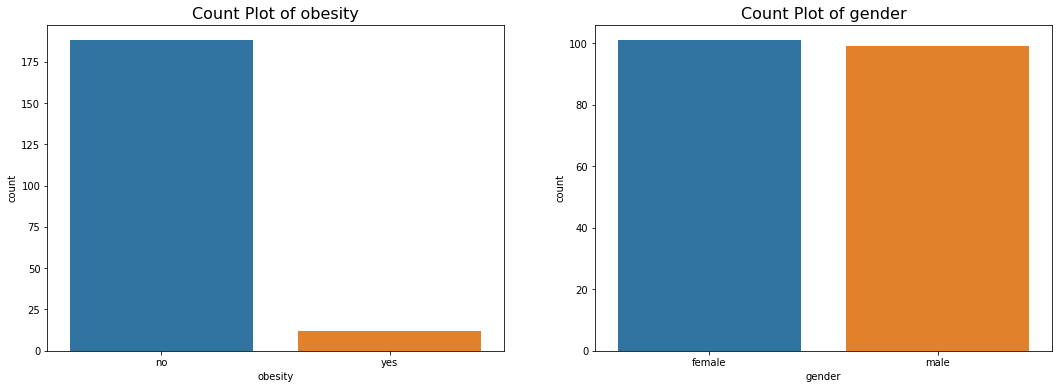

In [ ]:
# visualization of obesity, gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='obesity', data=df, ax=ax[0], order = df['obesity'].value_counts().index)
ax[0].set_title('Count Plot of obesity', fontsize=16)

sns.countplot(x='gender', data=df, ax=ax[1], order = df['gender'].value_counts().index)
ax[1].set_title('Count Plot of gender', fontsize=16)


Data processing and modeling 

In [ ]:
# Let's scale the data first
value_cols = ['age','height']
X = df.loc[:, df.columns.isin(value_cols)]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)



In [ ]:
# determine the best number of clusters
clusters = range(2, 20)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_jobs=-1)
    kmeans = kmeans.fit(df_scaled)
    label = kmeans.predict(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, label))

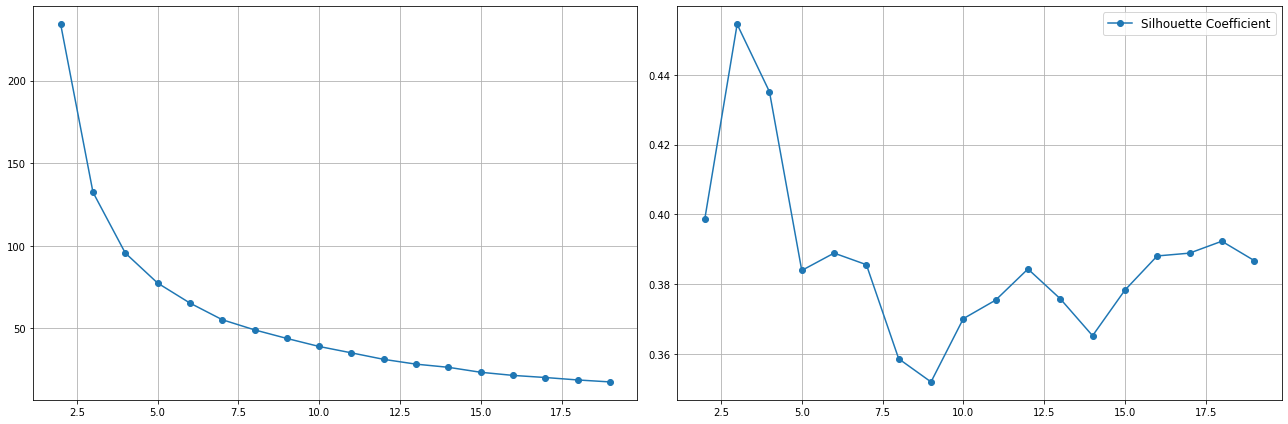

In [ ]:

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

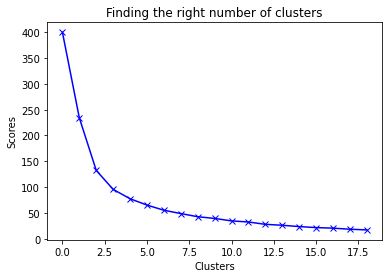

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [ ]:
# build K-Means model
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(4, 2)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [X.columns])
cluster_centers       

,age,height
0,0.881816,0.851025
1,0.445063,-0.916446
2,-1.629103,-0.645827
3,-0.377060,0.979456


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [X.columns])
cluster_centers


,age,height
0,82.897959,185.734694
1,77.985714,160.542857
2,54.657143,164.400000
3,68.739130,187.565217


In [ ]:
labels.shape # Labels associated to each data point

(200,)

In [ ]:
labels.max()

3

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([0, 1, 0, 3, 0, 0, 0, 1, 3, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 3,
       0, 1, 3, 0, 3, 2, 3, 1, 0, 1, 1, 3, 0, 1, 3, 2, 0, 0, 0, 3, 1, 3,
       3, 1, 2, 3, 0, 2, 0, 0, 2, 3, 0, 3, 0, 2, 1, 2, 1, 3, 0, 2, 3, 2,
       0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 3, 1, 1, 0, 1, 1,
       0, 0, 1, 3, 2, 0, 0, 3, 0, 1, 0, 3, 0, 2, 0, 0, 3, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3, 3, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 3, 0, 2, 3, 3, 3, 0, 0, 1, 1, 0, 1, 3, 1, 2, 3, 2, 2,
       0, 1, 3, 0, 1, 3, 0, 2, 0, 0, 0, 3, 3, 3, 3, 1, 3, 0, 3, 3, 0, 3,
       1, 3, 0, 0, 1, 0, 3, 3, 1, 0, 2, 0, 0, 3, 1, 1, 2, 2, 3, 2, 0, 3,
       3, 2], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
X_cluster = pd.concat([X, pd.DataFrame({'cluster':labels})], axis = 1)
X_cluster.head()

,age,height,cluster
0,82,154,1
1,76,191,3
2,76,164,1
3,83,187,0
4,69,163,1


In [ ]:
X_cluster.groupby(['cluster']).agg({'age': ['mean', 'min', 'max','count'],'height': ['mean', 'min', 'max','count']})

age                    height                
              mean min max count        mean  min  max count
cluster                                                     
0        82.897959  77  89    49  185.734694  172  199    49
1        77.985714  66  89    70  160.542857  150  173    70
2        54.657143  38  66    35  164.400000  151  183    35
3        68.739130  60  76    46  187.565217  173  199    46

In [ ]:
X_cluster.groupby(['cluster']).agg({'height': ['mean', 'min', 'max','count']})

height                
               mean  min  max count
cluster                            
0        185.734694  172  199    49
1        160.542857  150  173    70
2        164.400000  151  183    35
3        187.565217  173  199    46

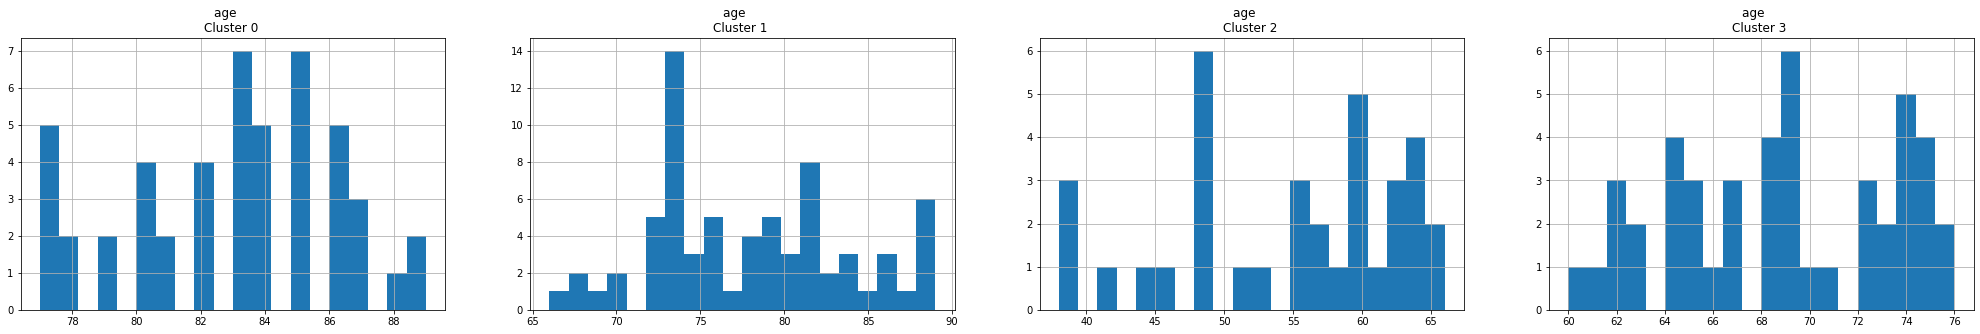

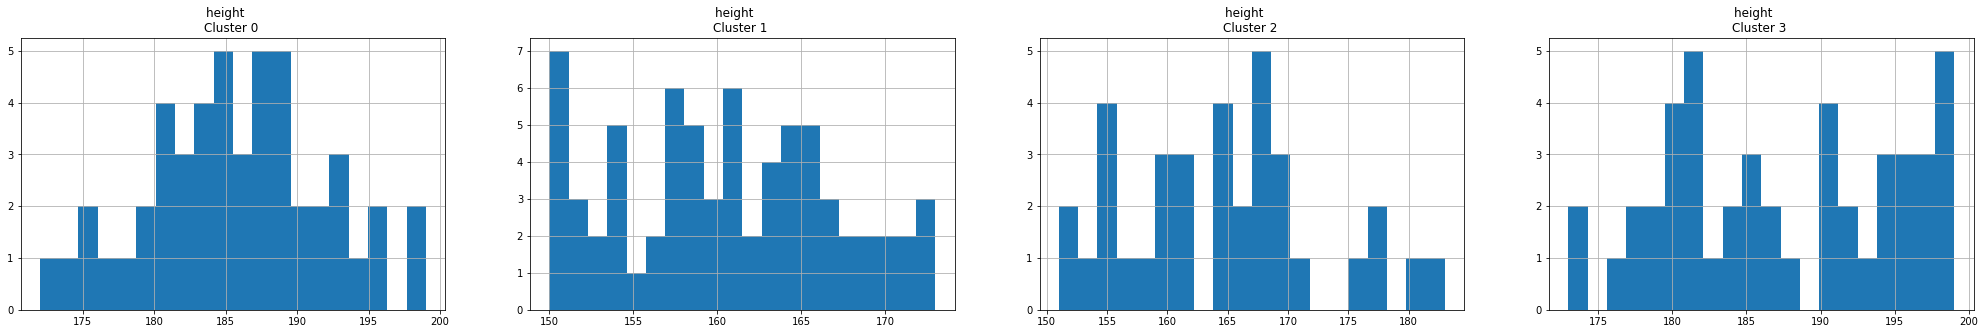

In [ ]:
# Plot the histogram of various clusters
for i in X.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = X_cluster[X_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



PCA

In [ ]:
# PCA for dimension reduction
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(df_scaled)
pca_feature = pca.transform(df_scaled)

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[ 4.05539553e-01, -1.53970643e+00],
       [-1.05284883e+00,  6.73116682e-01],
       [ 2.86647256e-01, -6.66379403e-01],
       [-1.29449189e+00,  3.45858924e-02],
       [ 7.76345147e-01, -2.75903444e-01],
       [ 7.42981133e-01, -1.49993064e+00],
       [ 1.56028542e+00, -6.82626355e-01],
       [-1.12555357e+00,  9.97299668e-01],
       [-1.17217618e+00, -3.39208060e-01],
       [ 6.51096148e-02, -1.93363519e-01],
       [-2.42826419e-01, -1.39429694e+00],
       [-1.46641856e+00,  4.57990811e-01],
       [ 4.12386378e-01, -5.40640281e-01],
       [-2.06038993e-01,  3.29263332e-01],
       [ 9.58107005e-01, -1.08636091e+00],
       [ 4.61997344e-01, -5.90251248e-01],
       [ 1.18306806e+00, -1.05984372e+00],
       [-1.43348961e+00, -2.03633756e-01],
       [ 2.83223844e-01, -1.16591248e+00],
       [ 8.45626478e-01, -1.09961950e+00],
       [-1.54597013e+00, -2.16892351e-01],
       [-1.75424918e+00,  3.68604061e-01],
       [ 9.08496039e-01, -1.03674994e+00],
       [-1.

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,0.405540,-1.539706
1,-1.052849,0.673117
2,0.286647,-0.666379
3,-1.294492,0.034586
4,0.776345,-0.275903


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.405540,-1.539706,1
1,-1.052849,0.673117,3
2,0.286647,-0.666379,1
3,-1.294492,0.034586,0
4,0.776345,-0.275903,1


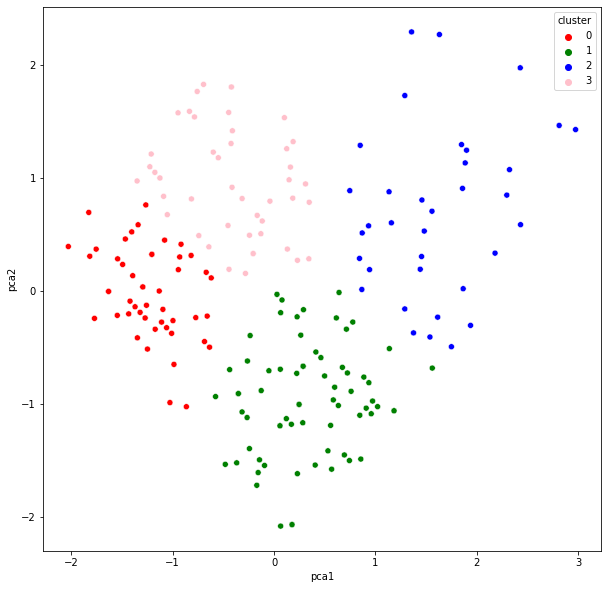

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

In [ ]:
# Cluster interpretation


K-prototype

In [ ]:
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [ ]:
#df_cat=df

In [ ]:
#df_cat['Age_cat']=pd.cut(df_cat.age,bins=[0,60,70,80,90],labels=['<=60','60-70','70-80','80-90'])
#df_cat['Age_cat']=df_cat['Age_cat'].astype('object')

In [ ]:
#df_cat['Height_cat']=pd.cut(df_cat.height,bins=[0,160,170,180,190,200],labels=['<=160','160-170','170-180','180-190','>190'])
#df_cat['Height_cat']=df_cat['Height_cat'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                200 non-null    int64 
 1   smoking            200 non-null    object
 2   alcohol_use        200 non-null    object
 3   physical_activity  200 non-null    object
 4   diet               200 non-null    object
 5   obesity            200 non-null    object
 6   gender             200 non-null    object
 7   height             200 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


In [ ]:
df.shape

(200, 8)

In [ ]:
# Standardizing all the numerical variables
#from sklearn import preprocessing
#scaler = StandardScaler()

#Num_features=df.select_dtypes(include=[np.number]).columns
#df[Num_features]=scaler.fit_transform(df[Num_features])
#df.head()


In [ ]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['smoking', 'alcohol_use', 'physical_activity', 'diet', 'obesity', 'gender']
Categorical columns position  : [1, 2, 3, 4, 5, 6]


In [ ]:
#convert dataframe to matrix
dfMatrix= df.to_numpy()
dfMatrix

array([[82, 'no', 'no', ..., 'no', 'male', 154],
       [76, 'no', 'no', ..., 'no', 'female', 191],
       [76, 'no', 'no', ..., 'no', 'female', 164],
       ...,
       [89, 'no', 'no', ..., 'no', 'female', 174],
       [85, 'no', 'no', ..., 'no', 'male', 195],
       [59, 'often', 'often', ..., 'yes', 'female', 162]], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


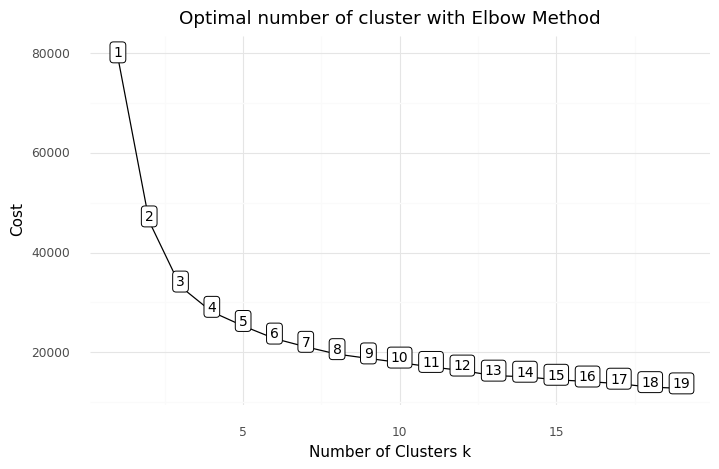

<ggplot: (8790572874029)>

In [ ]:
# Choosing optimal K
cost = []
for cluster in range(1, 20):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 20), 'Cost':cost})
# Show the first 5 rows
df_cost.head()
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) + 
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
pred=kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [ ]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

28113.99483302053

In [ ]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'1', 1:'2', 2:'3', 3:'4'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['1','2','3','4'])

In [ ]:
#df[Num_features]=scaler.inverse_transform(df[Num_features])

In [ ]:
df.head()

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,Cluster Labels,Segment
0,82,no,no,running,balanced,no,male,154,1,2
1,76,no,no,running,vegan,no,female,191,2,3
2,76,no,no,swimming,vegetarian,no,female,164,1,2
3,83,no,no,running,vegetarian,no,male,187,0,1
4,69,no,no,exercise,vegetarian,no,female,163,1,2


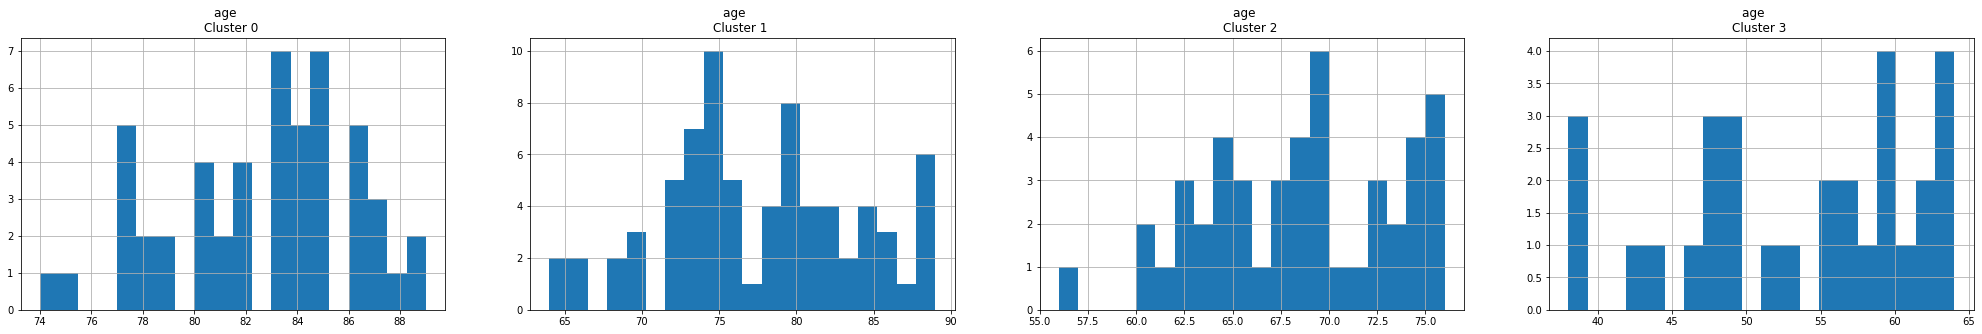

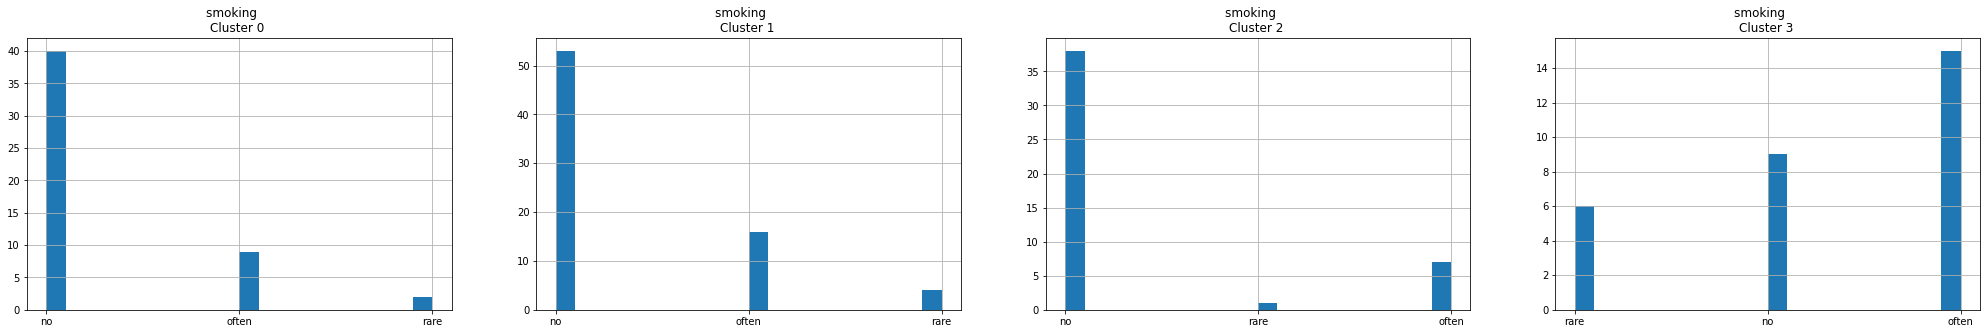

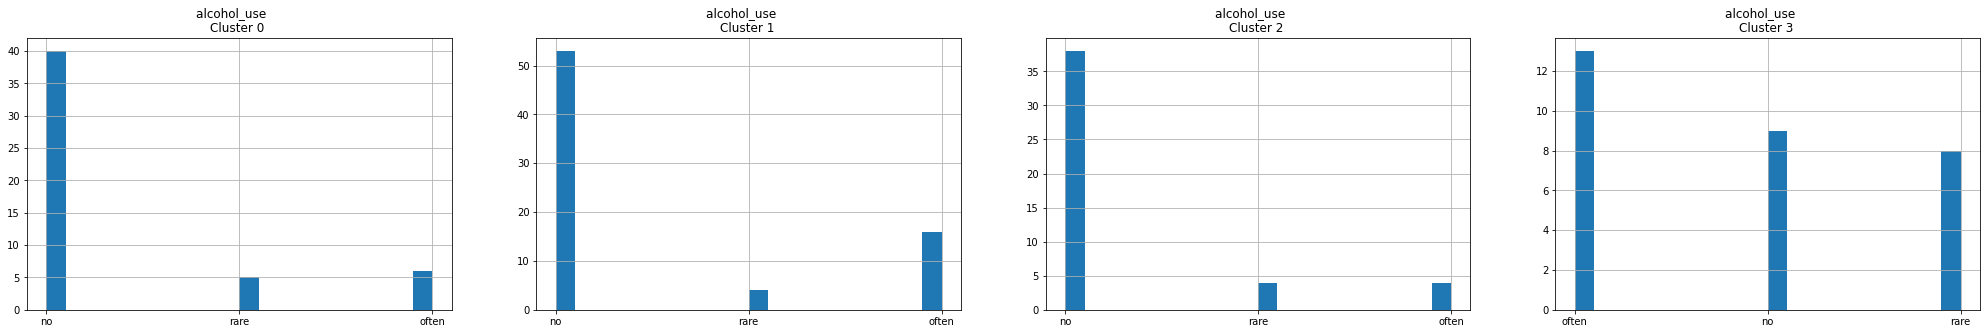

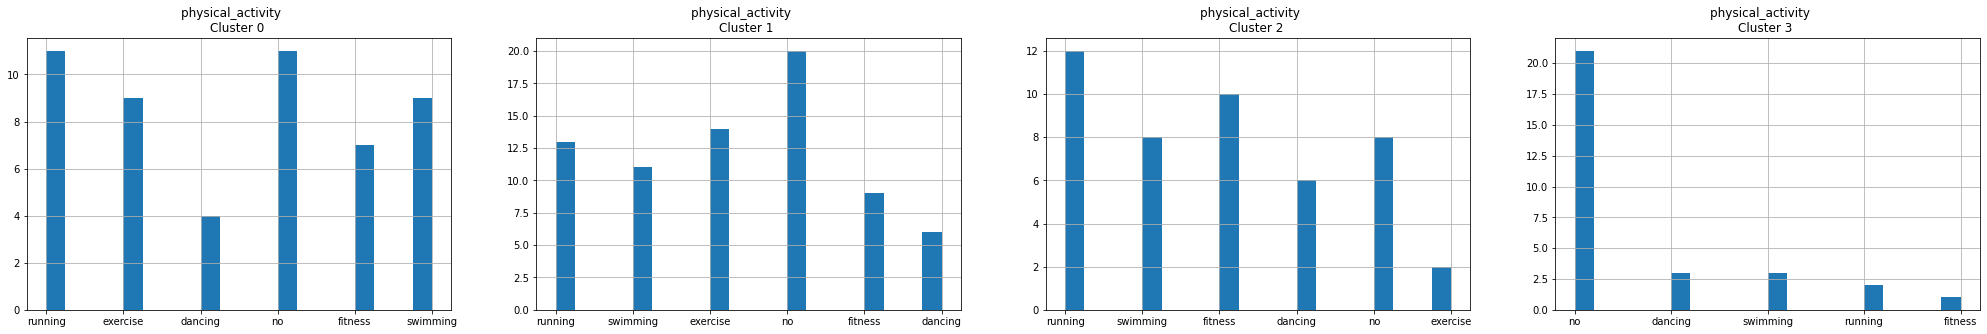

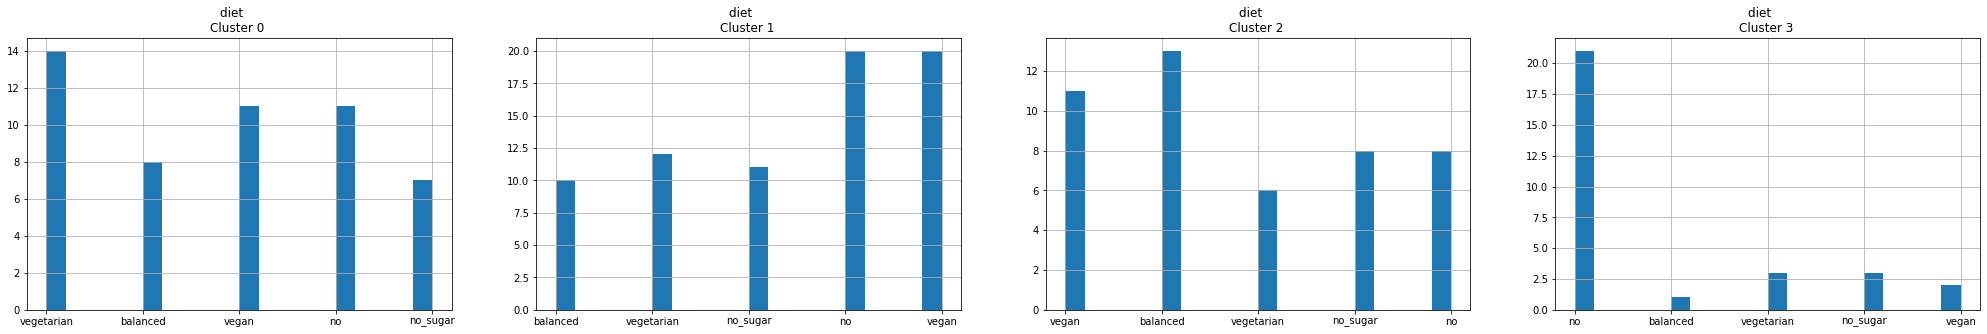

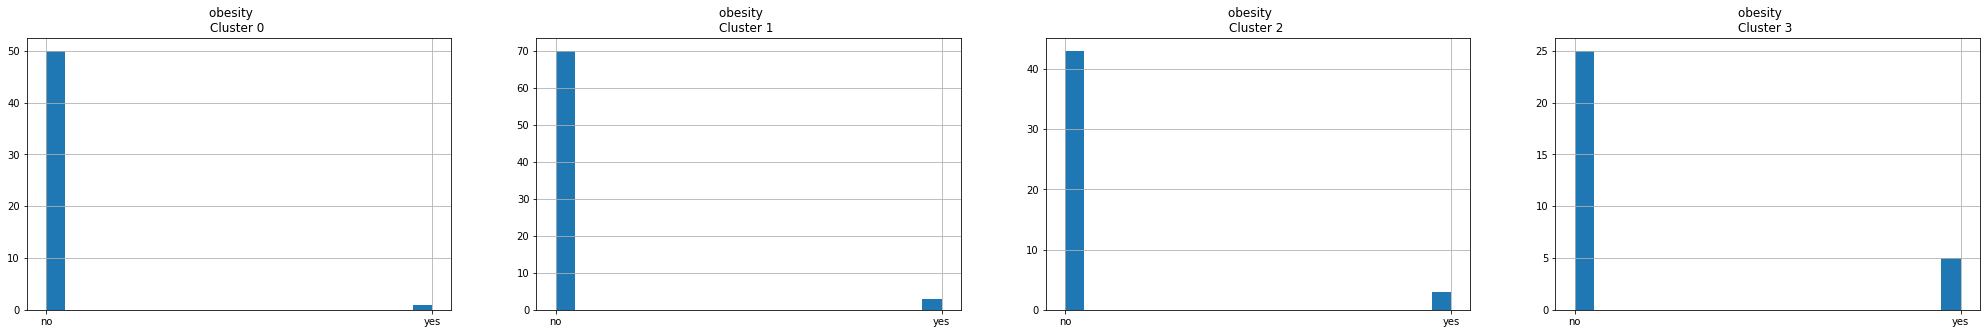

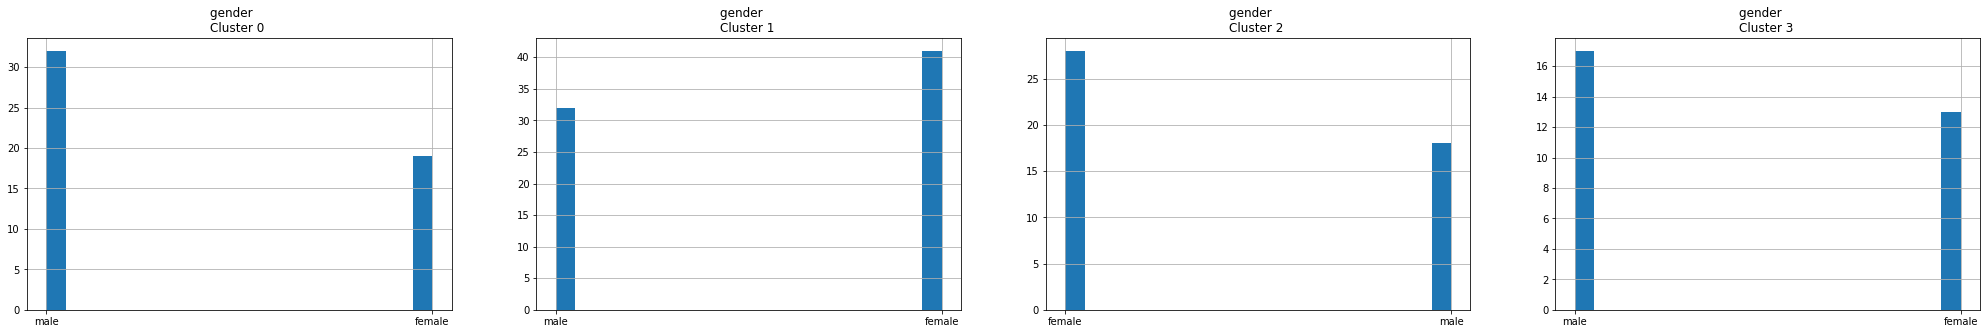

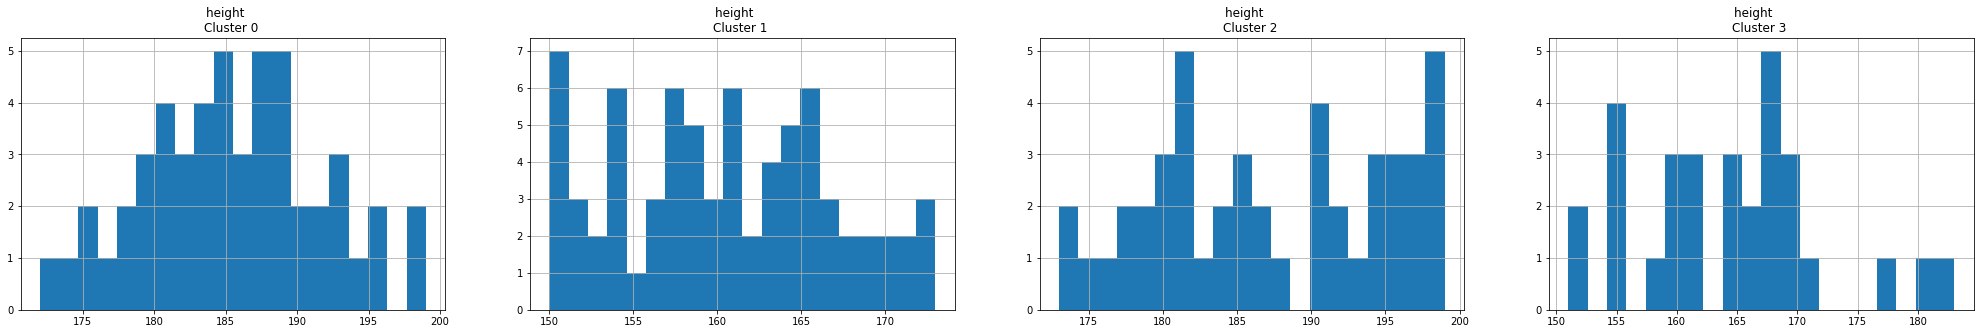

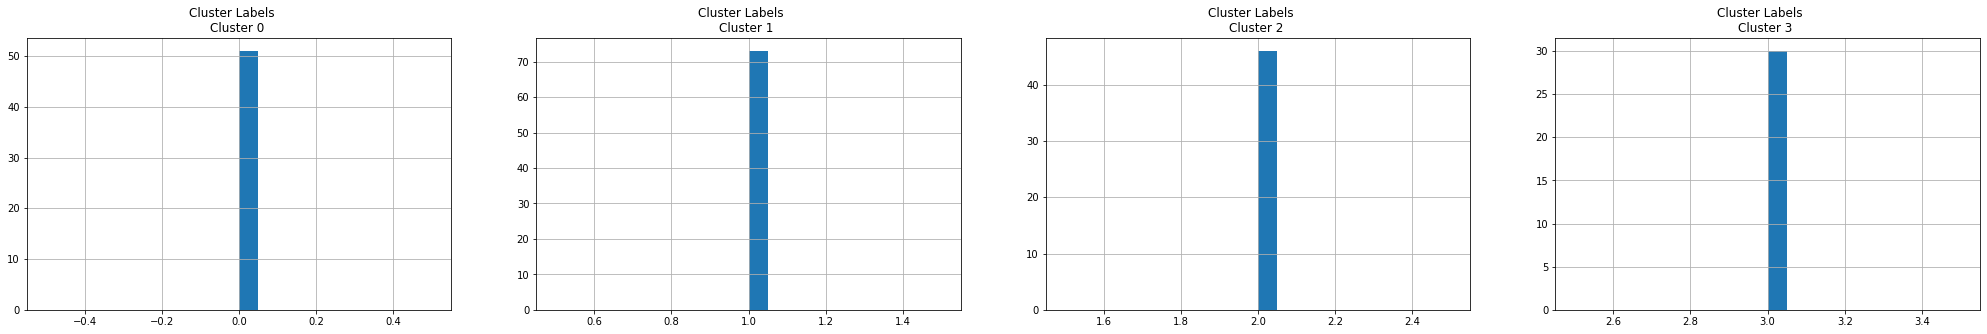

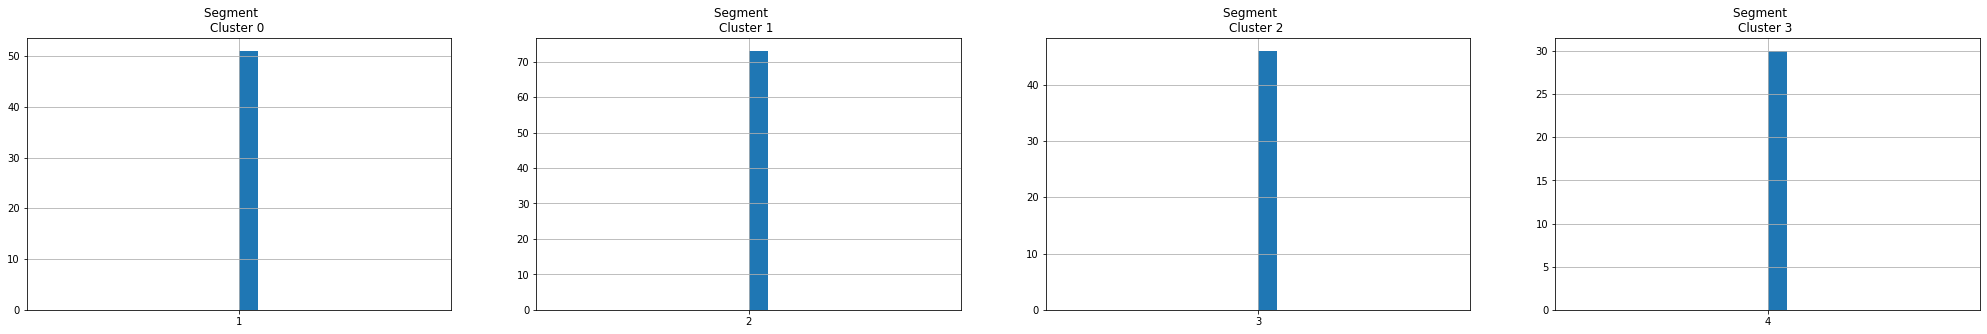

In [ ]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df[df['Cluster Labels'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


In [ ]:
df.head()

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,Cluster Labels,Segment
0,82,no,no,running,balanced,no,male,154,1,2
1,76,no,no,running,vegan,no,female,191,2,3
2,76,no,no,swimming,vegetarian,no,female,164,1,2
3,83,no,no,running,vegetarian,no,male,187,0,1
4,69,no,no,exercise,vegetarian,no,female,163,1,2


In [ ]:
# Cluster interpretation
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df.groupby('Segment').agg(
    {
        'Total':'count',
        'smoking': lambda x: x.value_counts().index[0],
        'alcohol_use': lambda x: x.value_counts().index[0],
        'physical_activity': lambda x: x.value_counts().index[0],
        'diet': lambda x: x.value_counts().index[0],
        'obesity': lambda x: x.value_counts().index[0],
        'gender': lambda x: x.value_counts().index[0],
        'age': 'mean',
        'height': 'mean'
    }
).reset_index()

,Segment,Total,smoking,alcohol_use,physical_activity,diet,obesity,gender,age,height
0,1,51,no,no,no,vegetarian,no,male,82.568627,185.470588
1,2,73,no,no,no,no,no,female,77.452055,160.452055
2,3,46,no,no,running,balanced,no,female,68.021739,187.456522
3,4,30,often,often,no,no,no,male,53.400000,164.200000


In [ ]:
df.groupby(['smoking', 'alcohol_use','gender']).agg({'smoking': np.size, 'alcohol_use': np.size, 'gender':np.size})

smoking  alcohol_use  gender
smoking alcohol_use gender                              
no      no          female       74           74      74
                    male         66           66      66
often   often       female       10           10      10
                    male         19           19      19
        rare        female       10           10      10
                    male          8            8       8
rare    often       female        7            7       7
                    male          3            3       3
        rare        male          3            3       3

**Autoencoder**

In [ ]:
cat_cols = ['smoking', 'alcohol_use', 'physical_activity', 'diet', 'obesity', 'gender']
X_cat = df.loc[:, df.columns.isin(cat_cols)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_numerical = df[['age','height']]
X_numerical

,age,height
0,0.862745,0.081633
1,0.745098,0.836735
2,0.745098,0.285714
3,0.882353,0.755102
4,0.607843,0.265306
...,...,...
195,0.549020,0.306122
196,0.705882,0.142857
197,1.000000,0.489796
198,0.921569,0.918367


In [ ]:
X_all= pd.concat([X_cat, X_numerical],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_A = scaler.fit_transform(X_all)
X_A.shape

(200, 23)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(23,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(23, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
autoencoder.fit(X_A, X_A, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
2/2 [==============================] - 1s 44ms/step - loss: 0.2949
Epoch 2/25
2/2 [==============================] - 0s 42ms/step - loss: 0.2604
Epoch 3/25
2/2 [==============================] - 0s 39ms/step - loss: 0.1939
Epoch 4/25
2/2 [==============================] - 0s 40ms/step - loss: 0.1660
Epoch 5/25
2/2 [==============================] - 0s 41ms/step - loss: 0.1489
Epoch 6/25
2/2 [==============================] - 0s 38ms/step - loss: 0.1418
Epoch 7/25
2/2 [==============================] - 0s 40ms/step - loss: 0.1326
Epoch 8/25
2/2 [==============================] - 0s 38ms/step - loss: 0.1181
Epoch 9/25
2/2 [==============================] - 0s 37ms/step - loss: 0.1079
Epoch 10/25
2/2 [==============================] - 0s 40ms/step - loss: 0.1026
Epoch 11/25
2/2 [==============================] - 0s 39ms/step - loss: 0.0986
Epoch 12/25
2/2 [==============================] - 0s 38ms/step - loss: 0.0931
Epoch 13/25
2/2 [==============================] - 0s 40ms/st

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(X_A)

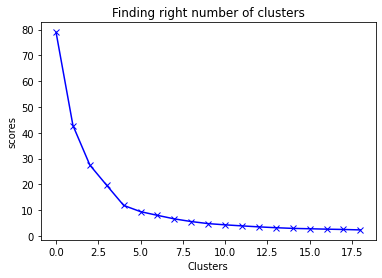

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(X_A)

In [ ]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster_auto':labels})], axis = 1)
df_cluster_dr.head()

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,Total,Segment,cluster_auto
0,0.862745,no,no,running,balanced,no,male,0.081633,3,4,2
1,0.745098,no,no,running,vegan,no,female,0.836735,1,2,1
2,0.745098,no,no,swimming,vegetarian,no,female,0.285714,3,4,1
3,0.882353,no,no,running,vegetarian,no,male,0.755102,0,1,2
4,0.607843,no,no,exercise,vegetarian,no,female,0.265306,1,2,1


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,0.059931,0.340875
1,-0.435904,-0.170796
2,-0.491535,0.016283
3,-0.107328,0.273884
4,-0.438873,-0.121210


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.059931,0.340875,2
1,-0.435904,-0.170796,1
2,-0.491535,0.016283,1
3,-0.107328,0.273884,2
4,-0.438873,-0.121210,1


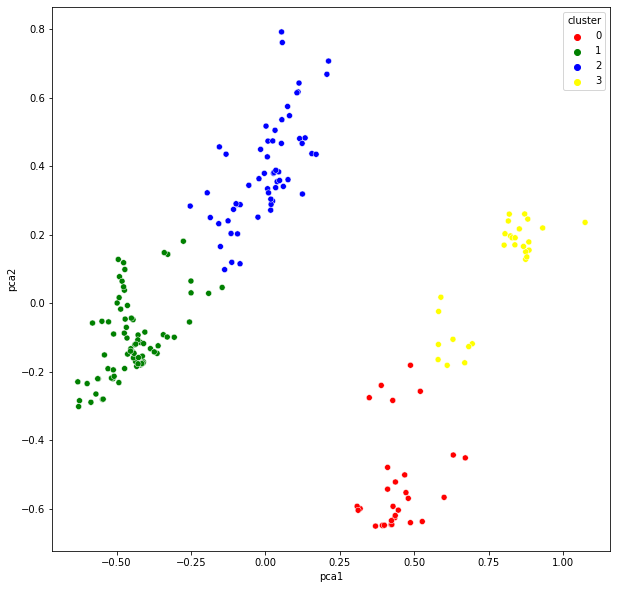

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

In [ ]:
df_cluster_dr.head()

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,Total,Segment,cluster_auto
0,0.862745,no,no,running,balanced,no,male,0.081633,3,4,2
1,0.745098,no,no,running,vegan,no,female,0.836735,1,2,1
2,0.745098,no,no,swimming,vegetarian,no,female,0.285714,3,4,1
3,0.882353,no,no,running,vegetarian,no,male,0.755102,0,1,2
4,0.607843,no,no,exercise,vegetarian,no,female,0.265306,1,2,1


In [ ]:
df_cluster_dr.info

<bound method DataFrame.info of           age smoking alcohol_use  ... Total Segment cluster_auto
0    0.862745      no          no  ...     3       4            2
1    0.745098      no          no  ...     1       2            1
2    0.745098      no          no  ...     3       4            1
3    0.882353      no          no  ...     0       1            2
4    0.607843      no          no  ...     1       2            1
..        ...     ...         ...  ...   ...     ...          ...
195  0.549020      no          no  ...     1       2            1
196  0.705882      no          no  ...     3       4            1
197  1.000000      no          no  ...     1       2            1
198  0.921569      no          no  ...     0       1            2
199  0.411765   often       often  ...     2       3            0

[200 rows x 11 columns]>

In [ ]:
df.to_csv ('df_heart_attack.csv', index = False, header=True)

In [ ]:
from google.colab import files
files.download('df_heart_attack.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>